In [2]:
import os
import sys 
function_dir = 'C:/Users/angus/Documents/git_repositories/ENGN4350_Honours/subsequence_dtw/'
sys.path.append(function_dir)
from _functions.visualisation import get_video_frame, event_visualisation
import _functions.visualisation as visualisation
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import cv2

#----- Parameters -----# 

time_offset = 0
start_time = 35

fps = 30

#----- Load Event Data -----#
mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
filename_dict ={'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mat',
                'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mat',
                'night'   : 'dvs_vpr_2020-04-27-18-13-29.mat',
                'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mat',
                'morning' : 'dvs_vpr_2020-04-28-09-14-11.mat',
                'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mat'}

filename = 'night'

event_datatset = loadmat(os.path.join(mat_dir, filename_dict[filename]))['data']

event_start_time = start_time
video_start_time = start_time + time_offset

M_event = event_visualisation(event_datatset, event_start_time , hold_time=0.1)
M_video = get_video_frame(filename, video_start_time, fps=fps)
# #----- Plotting -----#
# fig, ax = plt.subplots(1,2, figsize=(10,4))
# fig.suptitle(f"'{filename}' Alignment", fontweight='bold', fontsize=14)
# fig.text(0.5, 0.88, f"Start Time: {start_time}s      Time Offset(to video): {time_offset}s", ha='center', fontsize=12, fontweight='normal')
# fig.subplots_adjust(top=0.83)
# fig.tight_layout()
# ax[0].imshow(M_video)
# ax[0].axis(False)
# ax[1].imshow(M_event, cmap='bwr', vmin=-5, vmax=5)
# ax[1].axis(False)

# plt.show()


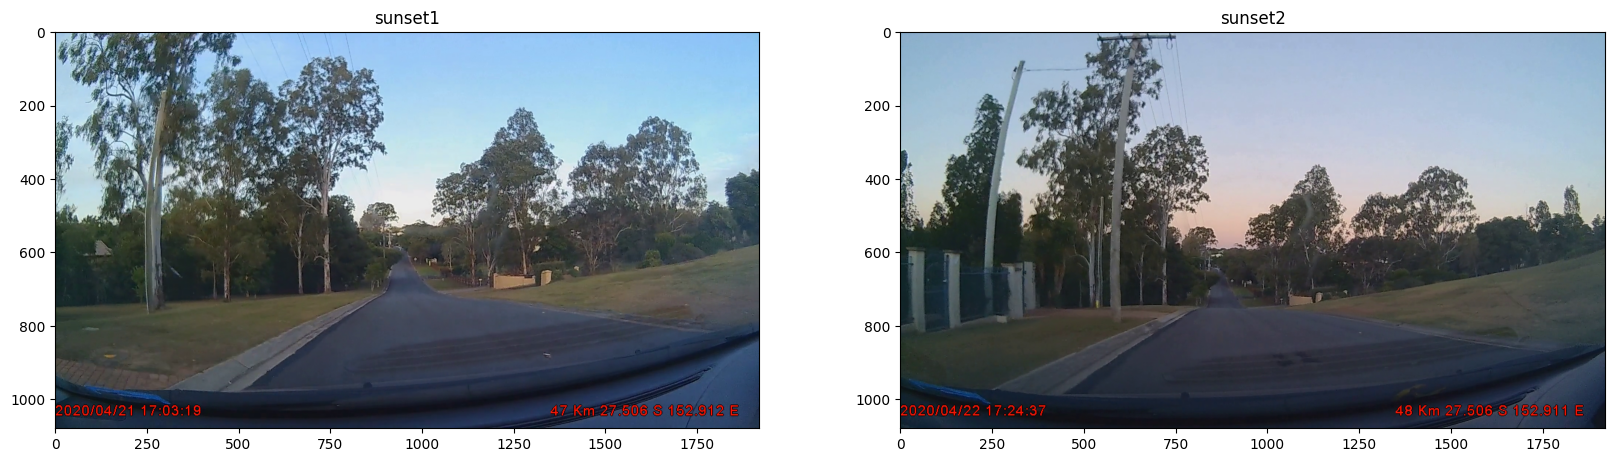

In [39]:
video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/videos/'

# filename_dict ={'sunset1' : '20200421_170039-sunset1_concat.mp4',
#                 'sunset2' : '20200422_172431-sunset2_concat.mp4'} 

# video_offset = {'sunset1' : 4.4,
#                 'sunset2' : -4.5}

filename_dict ={'sunset1' : '20200421_170039-sunset1_concat.mp4',
                'sunset2' : '20200422_172431-sunset2_concat.mp4',
                'night'   : '20200427_181204-night_concat.mp4',
                'daytime' : '20200424_151015-daytime_concat.mp4',
                'morning' : '20200428_091154-morning_concat.mp4',
                'sunrise' : '20200429_061912-sunrise_concat.mp4'} 

video_offset = {'sunset1' : 4.4,
                'sunset2' : -4.5,
                'daytime' : 0,
                'sunrise' : 4.5,
                'morning' : 0,
                'night'   : 0}



fps = 30

reference_name = 'sunset1'
frame_time = 20
start_frame_index = frame_time * fps

#----- Open Video Object using cv2 -----#
cap = cv2.VideoCapture(video_dir + filename_dict[reference_name])
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame_index) # set the start time

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
else: 
    ret, frame_sunset1 = cap.read() # read frame
    if ret == True:
        frame_sunset1 = cv2.cvtColor(frame_sunset1, cv2.COLOR_BGR2RGB) # convert frame from BGR to RGB
    else:
        print('Fail: ret = 0')
        frame_sunset1 = None

query_name = 'sunset2'
frame_time = 7.25
start_frame_index = frame_time * fps

#----- Open Video Object using cv2 -----#
cap = cv2.VideoCapture(os.path.join(video_dir, filename_dict[query_name]))
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame_index) # set the start time
# cv2.namedWindow('Video Player', cv2.WINDOW_NORMAL)
# cv2.resizeWindow('Video Player', 800, 600)  # Adjust the window size as needed


# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
else: 
    ret, frame_sunset2 = cap.read() # read frame
    if ret == True:
        frame_sunset2 = cv2.cvtColor(frame_sunset2, cv2.COLOR_BGR2RGB) # convert frame from BGR to RGB
    else:
        print('Fail: ret = 0')
        frame_sunset2 = None

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(frame_sunset1)
ax[0].set_title(f'{reference_name}')
ax[1].imshow(frame_sunset2)
ax[1].set_title(f'{query_name}')
plt.show()

In [12]:
# Load the videos
camera_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/videos/'
event_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Figures/_event_visualisation/'
gps_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Figures/_gps_visualisation/'

camera_video_dict = {'sunset1' : '20200421_170039-sunset1_concat.mp4',
                     'sunset2' : '20200422_172431-sunset2_concat.mp4',
                     'night'   : '20200427_181204-night_concat.mp4',
                     'daytime' : '20200424_151015-daytime_concat.mp4',
                     'morning' : '20200428_091154-morning_concat.mp4',
                     'sunrise' : '20200429_061912-sunrise_concat.mp4'} 


event_video_dict = {'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mp4',
                    'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mp4',
                    'night'   : 'dvs_vpr_2020-04-27-18-13-29.mp4',
                    'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mp4',
                    'morning' : 'dvs_vpr_2020-04-28-09-14-11.mp4',
                    'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mp4'}

gps_video_dict = {'sunset1' : 'sunset1.mp4',
                  'sunset2' : 'sunset2.mp4',
                  'night'   : 'night.mp4',
                  'daytime' : 'daytime.mp4',
                  'morning' : 'morning.mp4',
                  'sunrise' : 'sunrise.mp4'}


video_offset = {'sunset1' : 5,
                'sunset2' : -5,
                'daytime' : 0,
                'sunrise' : 4.5,
                'morning' : 0,
                'night'   : 1.5}



filename = 'night'
event_time= 20
# video_offset = 4.4

#---- Video ----#
video1_fps = 30
# video1_start_time = start_time + video_offset[filename]
video1_start_time = event_time + video_offset[filename]
video1 = cv2.VideoCapture(camera_video_dir + camera_video_dict[filename])
video1.set(cv2.CAP_PROP_POS_FRAMES, video1_fps * video1_start_time) # set the start time

# #---- GPS ----#
# video2_fps = 1
# video2_start_time = start_time
# video2 = cv2.VideoCapture(gps_video_dir + gps_video_dict[filename])
# video2.set(cv2.CAP_PROP_POS_FRAMES, video2_fps * video2_start_time) # set the start time


#---- Events ----#
video2_fps = 10
video2_start_time = event_time
video2 = cv2.VideoCapture(event_video_dir + event_video_dict[filename])
video2.set(cv2.CAP_PROP_POS_FRAMES, video2_fps * video2_start_time) # set the start time

# Check if videos were opened successfully
if not video1.isOpened() or not video2.isOpened():
    print("Error: Cannot open videos.")
    exit()

# Get the dimensions of the videos
width = int(video1.get(3)) + int(video2.get(3))
height = max(int(video1.get(4)), int(video2.get(4)))

# Create a window to display the videos
cv2.namedWindow('Side-by-Side Videos', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Side-by-Side Videos', width//2, height//2)


# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
output_filename = 'output_video.mp4'
# out = cv2.VideoWriter(output_filename, fourcc, 30, (width, height))

frame_counter = 0
while True:
    if frame_counter == 3:
        frame_counter = 0
    # Read frames from the videos
    ret1, frame1 = video1.read()
    if frame_counter == 0:
        ret2, frame2 = video2.read()
    
    frame_counter += 1

    # Break the loop if either video ends
    if not ret1 or not ret2:
        break

    # Resize the frames to have the same height (if needed)
    if frame1.shape[0] != height:
        frame1 = cv2.resize(frame1, (int(frame1.shape[1] * height / frame1.shape[0]), height))
    if frame2.shape[0] != height:
        frame2 = cv2.resize(frame2, (int(frame2.shape[1] * height / frame2.shape[0]), height))

    # Create a side-by-side frame
    side_by_side = cv2.hconcat([frame1, frame2])
    # out.write(side_by_side)

    # Display the side-by-side frame
    cv2.imshow('Side-by-Side Videos', side_by_side)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video objects and close the window
video1.release()
video2.release()
out.release()

cv2.destroyAllWindows()

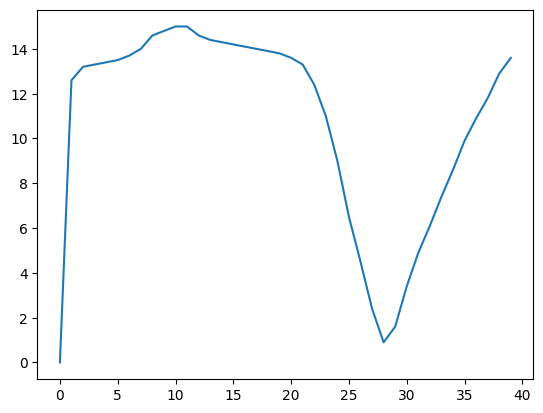

In [55]:
# Load the videos
event_data_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
camera_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/videos/'
event_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Figures/_event_visualisation/'
gps_data_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/gps_files/'

camera_video_dict = {'sunset1' : '20200421_170039-sunset1_concat.mp4',
                     'sunset2' : '20200422_172431-sunset2_concat.mp4',
                     'night'   : '20200427_181204-night_concat.mp4',
                     'daytime' : '20200424_151015-daytime_concat.mp4',
                     'morning' : '20200428_091154-morning_concat.mp4',
                     'sunrise' : '20200429_061912-sunrise_concat.mp4'} 


event_video_dict = {'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mp4',
                    'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mp4',
                    'night'   : 'dvs_vpr_2020-04-27-18-13-29.mp4',
                    'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mp4',
                    'morning' : 'dvs_vpr_2020-04-28-09-14-11.mp4',
                    'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mp4'}

'''
    GPS csv header order:
        latiude(deg), longitude(deg), altitude(m), distance travelled(m), speed(m/s)
        time of day(HHMMSS), elapsed time(s)     
'''
gps_file_dict = {'sunset1' : 'sunset1_gps.csv',
                 'sunset2' : 'sunset2_gps.csv',
                 'night'   : 'night_gps.csv',
                 'daytime' : 'daytime_gps.csv',
                 'morning' : 'morning_gps.csv',
                 'sunrise' : 'sunrise_gps.csv'}

video_offset = {'sunset1' : 4.4,
                'sunset2' : -4.4,
                'daytime' : 0,
                'sunrise' : 4.5,
                'morning' : 0,
                'night'   : 1.5}


data_file_name = 'sunset2'
event_data = loadmat(event_data_dir + filename_dict[data_file_name])['data']
gps_data = np.genfromtxt(gps_data_dir + gps_file_dict[data_file_name], delimiter=',')

event_time = 10
offset = 2

video_time = event_time + offset

plt.plot(gps_data[:40,4])

(-0.5, 1919.5, 1079.5, -0.5)

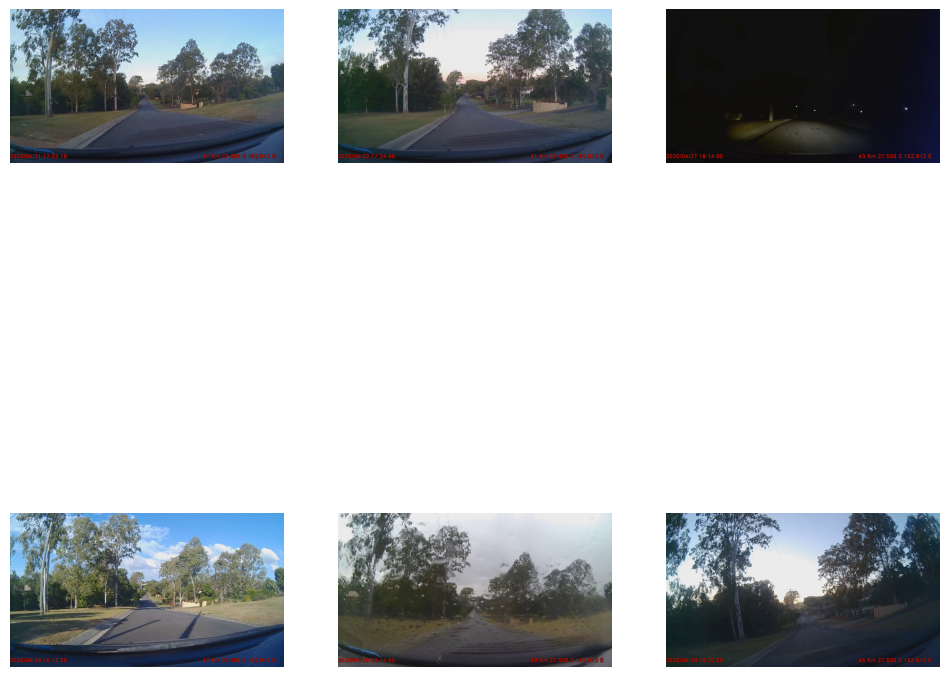

In [6]:
# Load the videos
camera_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/videos/'
event_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Figures/_event_visualisation/'
gps_video_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Figures/_gps_visualisation/'

camera_video_dict = {'sunset1' : '20200421_170039-sunset1_concat.mp4',
                     'sunset2' : '20200422_172431-sunset2_concat.mp4',
                     'night'   : '20200427_181204-night_concat.mp4',
                     'daytime' : '20200424_151015-daytime_concat.mp4',
                     'morning' : '20200428_091154-morning_concat.mp4',
                     'sunrise' : '20200429_061912-sunrise_concat.mp4'} 


sunset1_time = 15
sunset2_time = 15
night_time = 15
daytime_time = 15
morning_time = 15
sunrise_time = 15



#---- Get frame from each video

M_sunset1 = visualisation.get_video_frame('sunset1', sunset1_time)
M_sunset2 = visualisation.get_video_frame('sunset2', sunset2_time)
M_night = visualisation.get_video_frame('night', night_time)
M_daytime = visualisation.get_video_frame('daytime', daytime_time)
M_morning = visualisation.get_video_frame('morning', morning_time)
M_sunrise = visualisation.get_video_frame('sunrise', sunrise_time)


fig, ax = plt.subplots(2,3, figsize=(12,12))
fig.subplots_adjust()
fig.suptitle("Visual Comparison of each Data Set", fontweight=suptitle_weight, fontsize=suptitle_size)

ax[0][0].imshow(M_sunset1)
ax[0][0].set_title("Sunset1", fontweight=title_weight, fontsize=title_size)
ax[0][0].axis('off')

ax[0][1].imshow(M_sunset2)
ax[0][1].set_title("Sunset2", fontweight=title_weight, fontsize=title_size)
ax[0][1].axis('off')

ax[0][2].imshow(M_night)
ax[0][2].set_title("Night", fontweight=title_weight, fontsize=title_size)
ax[0][2].axis('off')

ax[1][0].imshow(M_daytime)
ax[1][0].set_title("Daytime", fontweight=title_weight, fontsize=title_size)
ax[1][0].axis('off')

ax[1][1].imshow(M_morning)
ax[1][1].set_title("Morning", fontweight=title_weight, fontsize=title_size)
ax[1][1].axis('off')

ax[1][2].imshow(M_sunrise)
ax[1][2].set_title("Sunrise", fontweight=title_weight, fontsize=title_size)
ax[1][2].axis('off')
plt.show()


